<a href="https://colab.research.google.com/github/RoshanV1701/Air-Quality-Index-Prediction/blob/main/AQI_Prediction_ServiceLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle



/content/gdrive/My Drive/Kaggle


In [10]:
!kaggle datasets download -d shrutibhargava94/india-air-quality-data

 96% 5.00M/5.22M [00:00<00:00, 20.1MB/s]
100% 5.22M/5.22M [00:00<00:00, 20.7MB/s]


In [11]:
!ls
!unzip \*.zip  && rm *.zip


india-air-quality-data.zip  kaggle.json
Archive:  india-air-quality-data.zip
  inflating: data.csv                


In [14]:
data = pd.read_csv('data.csv', encoding='cp1252')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



**PRELIMINARY DATA SET ANALYSIS**

In [15]:
data.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [16]:
data.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.describe() 

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [18]:
data.shape

(435742, 13)

**PRELIMINARY DATA EXPLORATION AND VISUALIZATION**

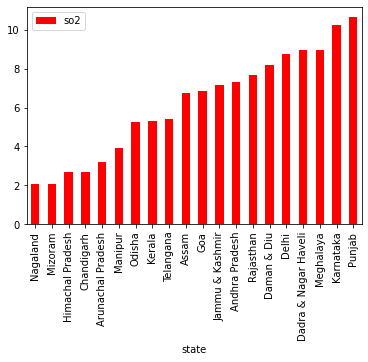

In [20]:
data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').head(20).plot.bar(color='r')
plt.show()

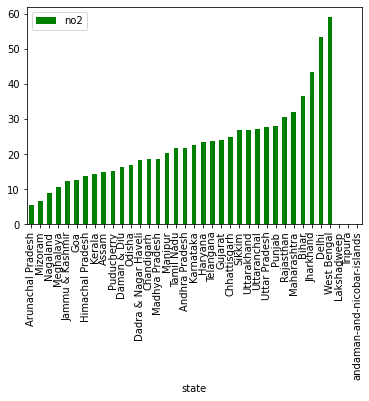

In [21]:

data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='g')
plt.show()

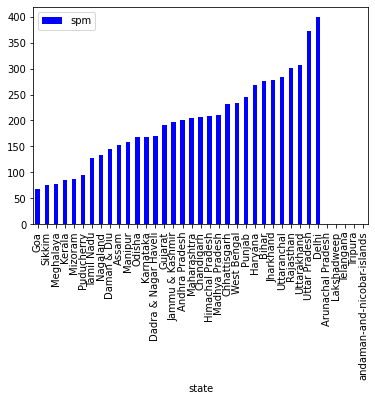

In [22]:
data[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='b')
plt.show()

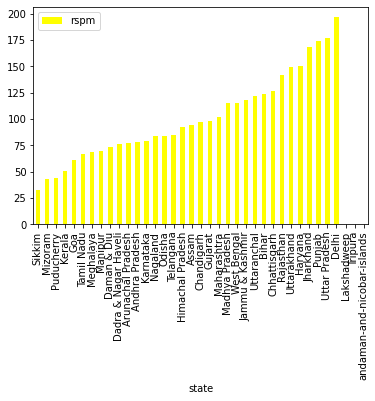

In [24]:
data[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='yellow')
plt.show()

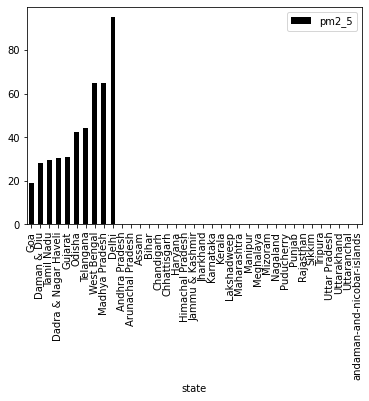

In [25]:
data[['pm2_5','state']].groupby(["state"]).mean().sort_values(by='pm2_5').plot.bar(color='black')
plt.show()


**DROPPING UNNECESSARY COLUMNS**

In [26]:
data.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [27]:
data.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)


In [28]:
data.head(5)


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


**ANALYZING MISSING VALUES**

In [29]:
total = data.isnull().sum().sort_values(ascending=False)
total.head()


pm2_5    426428
spm      237387
rspm      40222
so2       34646
no2       16233
dtype: int64

In [30]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()


,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
rspm,40222,9.230692
so2,34646,7.951035
no2,16233,3.725370


Text(0.5, 1.0, 'Percent missing data by feature')

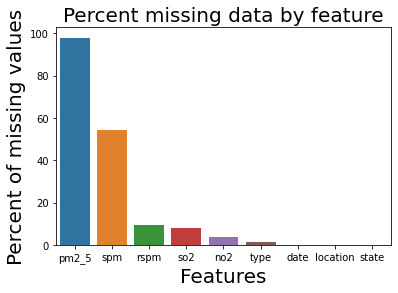

In [32]:
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

**DISTRIBUTIONS BY STATES**

In [31]:
data.groupby('state')[['spm','pm2_5','rspm','so2','no2']].mean()


,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,200.260378,NaN,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,NaN,76.629213,3.179104,5.469697
Assam,153.355386,NaN,93.724912,6.723263,14.793691
Bihar,276.917416,NaN,123.705176,19.381476,36.575525
Chandigarh,206.056150,NaN,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,NaN,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,30.511628,76.536530,8.939587,18.293959
Daman & Diu,145.681416,27.886364,73.749431,8.192958,16.168926
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147


**REPLACING VALUES BY MEAN**

In [34]:
grp_state = data.groupby('state')
def impute_mean_by_state(series):
    return series.fillna(series.mean())


In [35]:
data['rspm']=grp_state['rspm'].transform(impute_mean_by_state)  
data['so2']=grp_state['so2'].transform(impute_mean_by_state)
data['no2']=grp_state['no2'].transform(impute_mean_by_state)
data['spm']=grp_state['spm'].transform(impute_mean_by_state)
data['pm2_5']=grp_state['pm2_5'].transform(impute_mean_by_state)

In [36]:
data.describe()


,so2,no2,rspm,spm,pm2_5
count,435739.000000,435739.000000,435739.000000,431671.000000,123689.000000
mean,10.589141,25.663170,109.680907,215.198748,48.317274
std,10.863679,18.271145,72.519399,117.470157,21.455206
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,4.800000,14.000000,59.000000,142.000000,30.729696
50%,8.000000,21.800000,93.000000,205.255823,42.204089
75%,13.000000,32.000000,142.016832,248.000000,64.890625
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


 **CALCULATE AIR QUALITY INDEX FOR SO2**

In [37]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


**CALCULATE AIR QUALITY INDEX FOR NO2**

In [38]:

def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


**CALCULATE AIR QUALITY INDEX FOR RSPM**

In [39]:

def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
data['RSPMi']=data['rspm'].apply(cal_RSPMi)
df= data[['rspm','RSPMi']]
df.head()

,rspm,RSPMi
0,78.182824,78.182824
1,78.182824,78.182824
2,78.182824,78.182824
3,78.182824,78.182824
4,78.182824,78.182824


 **CALCULATE AIR QUALITY INDEX FOR SPM**

In [40]:

def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


**CALCULATE AIR QUALITY INDEX FOR PM 2.5**

In [45]:

def cal_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
data['PMi']=data['pm2_5'].apply(cal_pmi)
df= data[['pm2_5','PMi']]
df.head()
df.tail(10)

,pm2_5,PMi
435732,64.890625,64.890625
435733,64.890625,64.890625
435734,64.890625,64.890625
435735,64.890625,64.890625
435736,64.890625,64.890625
435737,64.890625,64.890625
435738,64.890625,64.890625
435739,NaN,NaN
435740,NaN,NaN
435741,NaN,NaN


In [47]:

def cal_aqi(si,ni,pmi):
    aqi=0
    if(si>ni and si>pmi):
     aqi=si
    if(ni>si and ni>pmi):
     aqi=ni
    if(pmi>si and pmi>ni):
     aqi=pmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['PMi']), axis=1)
df= data[['state','SOi','Noi','PMi','AQI']]
df.head()

,state,SOi,Noi,PMi,AQI
0,Andhra Pradesh,6.000,21.750,NaN,0.0
1,Andhra Pradesh,3.875,8.750,NaN,0.0
2,Andhra Pradesh,7.750,35.625,NaN,0.0
3,Andhra Pradesh,7.875,18.375,NaN,0.0
4,Andhra Pradesh,5.875,9.375,NaN,0.0


In [48]:
data.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01,6.000,21.750,78.182824,166.840252,NaN,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01,3.875,8.750,78.182824,166.840252,NaN,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01,7.750,35.625,78.182824,166.840252,NaN,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01,7.875,18.375,78.182824,166.840252,NaN,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01,5.875,9.375,78.182824,166.840252,NaN,0.0


**DEFINING AQI RANGE**

In [49]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01,6.000,21.750,78.182824,166.840252,NaN,0.0,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01,3.875,8.750,78.182824,166.840252,NaN,0.0,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01,7.750,35.625,78.182824,166.840252,NaN,0.0,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01,7.875,18.375,78.182824,166.840252,NaN,0.0,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01,5.875,9.375,78.182824,166.840252,NaN,0.0,Good


In [50]:
d=data
data=data.dropna(subset=['spm'])
data=data.dropna(subset=['pm2_5'])
data.isna().sum() 

state           0
location        0
type         1925
so2             0
no2             0
rspm            0
spm             0
pm2_5           0
date            1
SOi             0
Noi             0
RSPMi           0
SPMi            0
PMi             0
AQI             0
AQI_Range       0
dtype: int64

**PREDICTION USING LINEAR REGRESSION**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [53]:
X1= data[['so2','no2','pm2_5']]
y1 = data['AQI']
y1.tail()

435734    64.890625
435735    64.890625
435736    64.890625
435737    64.890625
435738    64.890625
Name: AQI, dtype: float64

In [54]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2,random_state=101)


In [55]:
X_train1.head()


,so2,no2,pm2_5
360028,3.0,32.0,29.550441
434684,2.0,37.0,64.890625
64493,10.6,18.7,30.511628
433906,4.0,44.0,64.890625
183595,27.5,20.8,65.064565


In [56]:
LR1 = LinearRegression()
LR1.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
prediction1 = LR1.predict(X_test1)


Text(0, 0.5, 'Predicted Y')

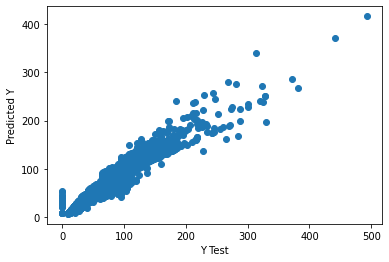

In [59]:

plt.scatter(y_test1,prediction1) #scatter plot for actual and predicted values
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [65]:
with open('AQI_LR_model','wb') as f: #saving the model
  pickle.dump(LR1,f)


In [68]:
y_test1_np= np.array(y_test1)
prediction1_np = np.array(prediction1)

In [70]:
LR1.score(X_test1,y_test1) #92 percent accurate predictions

0.9216102486522406

In [72]:
print('R^2_Square:%.2f '% r2_score(y_test1, prediction1))
print('Mean Square Error:%.2f '% np.sqrt(mean_squared_error(y_test1, prediction1)))

R^2_Square:0.92 
Mean Square Error:8.01 


**Classification of AQI Using Random forest classifier** 

In [73]:
from sklearn.ensemble import RandomForestClassifier


In [74]:
X2 = data[['SOi','Noi','pm2_5']]
y2 = data['AQI_Range']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)


In [76]:

RFmodel = RandomForestClassifier(n_estimators=10)
RFmodel.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
RFmodel.score(X_test2,y_test2) #yayyyy 99 % accuracy

0.9997468674851284

In [80]:
X_train2.head()


,SOi,Noi,pm2_5
360294,5.000000,30.000,29.550441
278096,7.250000,13.875,42.204089
277941,3.625000,32.875,42.204089
269637,22.875000,35.750,42.204089
272765,6.594842,15.875,42.204089


In [83]:
RFmodel.predict([[10,40,290]]) #tried values for Delhi - seems perfect

array(['Unhealthy'], dtype=object)

In [84]:
with open('AQI_RF_model','wb') as f: #saving the model
  pickle.dump(RFmodel,f)

**CONCLUSION**



*   AQI is highly correlated with all the independent variables(so2, no2, pm 2.5)
*   AQI has been increasing over the years.


